In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [2]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train = train.flow_from_directory('/kaggle/input/cat-and-dog/training_set/training_set', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [4]:
test = ImageDataGenerator(rescale = 1./255)
test = test.flow_from_directory('/kaggle/input/cat-and-dog/test_set/test_set/', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 2023 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

2022-11-08 09:28:10.898659: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [7]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x=train, validation_data=test, epochs=25)

2022-11-08 09:28:11.924814: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
251/251 [==============================] - 121s 477ms/step - loss: 0.6651 - accuracy: 0.5848 - val_loss: 0.6120 - val_accuracy: 0.6911
Epoch 2/25
251/251 [==============================] - 59s 233ms/step - loss: 0.5978 - accuracy: 0.6766 - val_loss: 0.6366 - val_accuracy: 0.6248
Epoch 3/25
251/251 [==============================] - 59s 233ms/step - loss: 0.5608 - accuracy: 0.7096 - val_loss: 0.5397 - val_accuracy: 0.7355
Epoch 4/25
251/251 [==============================] - 55s 220ms/step - loss: 0.5259 - accuracy: 0.7370 - val_loss: 0.5115 - val_accuracy: 0.7543
Epoch 5/25
251/251 [==============================] - 55s 218ms/step - loss: 0.5032 - accuracy: 0.7553 - val_loss: 0.4881 - val_accuracy: 0.7815
Epoch 6/25
251/251 [==============================] - 55s 220ms/step - loss: 0.4970 - accuracy: 0.7572 - val_loss: 0.4898 - val_accuracy: 0.7711
Epoch 7/25
251/251 [==============================] - 55s 218ms/step - loss: 0.4768 - accuracy: 0.7696 - val_loss: 0.4655 - val_a

cat


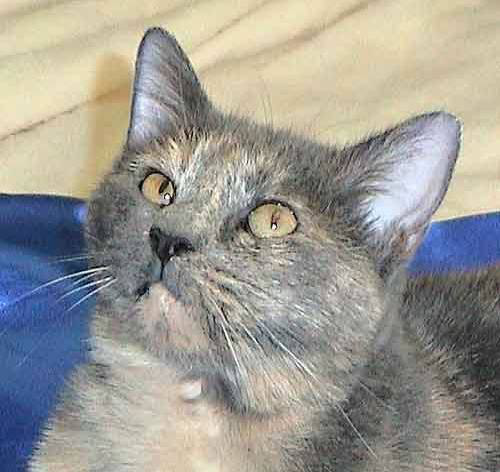

In [10]:
image.load_img('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1022.jpg')
test_img = image.load_img('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1022.jpg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train.class_indices
if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'
print(pred)
image.load_img('/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1022.jpg')

dog


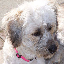

In [11]:
test_img = image.load_img('../input/cat-and-dog/training_set/training_set/dogs/dog.1014.jpg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train.class_indices
if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'
print(pred)
image.load_img('../input/cat-and-dog/training_set/training_set/dogs/dog.1014.jpg', target_size = (64, 64))